<h1 style="font-size: 40px; margin-bottom: 0px;">4.2 Python Image Analysis</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 850px;"></hr>

In this week's lecture, we went over how images are expressed as either 2D matrices (single channel) or 3D matrices (multi-channel or true-color) with each pixel as an element in the matrix containing a numerical value representing the intensity of light. We're all familiar with using ImageJ for analyzing images, but here, we'll use Python to perform many of the same analyses that we can do in ImageJ. If we have time, we can also make use of both ImageJ and Python to develop a pipeline for analyzing more complex data, such as our beating cardiomyocytes from MCB201A. 

<strong>Learning objectives:</strong>
<ul>
    <li>Understand how images are represented as a matrix</li>
    <li>Learn how to import and display images in a Python notebook</li>
    <li>Learn how to process images for analysis</li>
    <li>Learn how to analyze images to extract quantitative data</li>
    <li>Set up for loops and functions to analyze and plot a mulitple particles</li>
</ul>

For today's lesson, we'll be making use of the following packages:
<ul>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib.pyplot - we will also use matplotlib to display our images</li>
    <li><a href="https://scikit-image.org/" rel="noopener noreferrer" target="_blank">scikit-image (skimage)</a> - a package with a suite of tools for image analysis in Python. We'll make use of the <mark style="background-color: #EEEEEE;"><strong>skimage.measure</strong></mark> package and the <mark style="background-color: #EEEEEE;"><strong>color</strong></mark> package as well as other packages later on if we have time</li>
    <li>seaborn</li>
    <li>scipy.stats</li>
</ul>

In [3]:
#import our many packages for this lesson - we'll also import more later...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.measure
from skimage.color import label2rgb
import seaborn as sns
import scipy.stats as stats

<h1 style="font-size: 40px; margin-bottom: 0px;">Images as a matrix</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

As you recall from lecture, an 8-bit grayscale image can be represented as a 2D matrix containing values from 0 (black) to 255 (white).

Let's set up a quick, random 2D array below and use <mark style="background-color: #EEEEEE;"><strong>plt.imshow</strong></mark> to display our grayscale image. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <mark style="background-color: #EEEEEE;"><strong>plt.imshow</strong></mark> is here.</u></a>

We can make use of our usual random integer generator <mark style="background-color: #EEEEEE;"><strong>np.random.randint()</strong></mark>, but we will need to specify that we are working with 8-bit integers by setting the <mark style="background-color: #EEEEEE;"><strong>dtype</strong></mark> parameter to <mark style="background-color: #EEEEEE;"><strong>np.uint8</strong></mark>.
```
gray_img = np.random.randint(0, 256, size=[50,50], dtype=np.uint8)
```

In [4]:
#create a 2D array of random 8-bit integers for us to display as an image
gray_img = np.random.randint(0, 256, size=[50,50], dtype=np.uint8)

print(gray_img)

[[ 92   5 114 ... 217 146 226]
 [130 248 146 ... 193 227  54]
 [126 182 156 ...  73  42  97]
 ...
 [180 140 241 ...  81 151  66]
 [ 91 251 162 ... 163  23 167]
 [169 145 191 ... 187 141 211]]


Now that we have our 2D array of pixel intensities, we can display our image using <mark style="background-color: #EEEEEE;"><strong>plt.imshow</strong></mark>. However, we'll need to make some adjustments to the default parameters, so that we display our image as a grayscale image.

We'll set the <mark style="background-color: #EEEEEE;"><strong>cmap</strong></mark> parameter equal to <mark style="background-color: #EEEEEE;"><strong>'gray'</strong></mark> to tell the function to display our image in grayscale. And we'll specify the bit-depth by providing it with the maximum and minimum values, corresponding to black and white respectively. To do this, we'll set <mark style="background-color: #EEEEEE;"><strong>vmin</strong></mark> equal to 0 and <mark style="background-color: #EEEEEE;"><strong>vmax</strong></mark> equal to 255. We can also hide our plot axes by setting it to <mark style="background-color: #EEEEEE;"><strong>False</strong></mark> and suppressing further outputs in the line with a semicolon <mark style="background-color: #EEEEEE;"><strong>;</strong></mark>, so we only display our plot.
```
plt.imshow(gray_img, cmap='gray', vmin=0, vmax=255)
plt.axis(False);
```

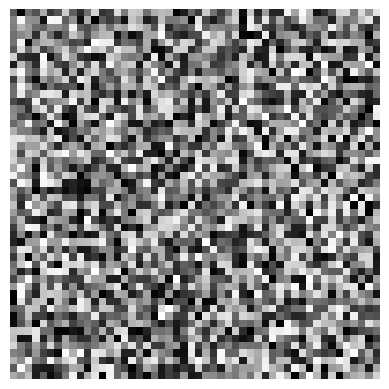

In [5]:
#use plt.imshow to display the 2D array
plt.imshow(
    gray_img, #our 2D array to display
    cmap='gray', #we want it displayed as grayscale image
    vmin=0, #specifying what value is black 
    vmax=255 #specifying what value is white
)
plt.axis(False); #we can tell Python to hide the axes

We can also do something similar for a true-color image. Let's create a 3-channel image using a similar set up that we used for our grayscale image. This time we will have 3 elements in the size object that we pass to our function in order to create a 3D array or random integers.
```
color_img = np.random.randint(0, 256, size=[50, 50, 3], dtype=np.uint8)
```

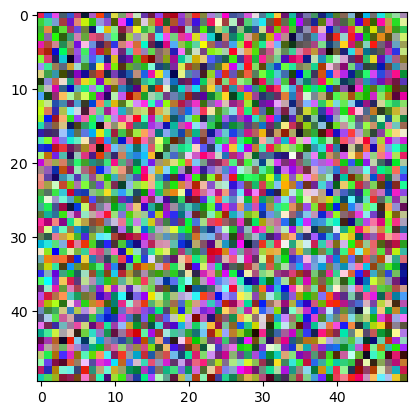

In [6]:
#we can display true-color images too - but we need a 3D array rather than a 2D one
color_img = np.random.randint(0, 256, size=[50, 50, 3], dtype=np.uint8)

plt.imshow(
    color_img, #our 3D array
    cmap='gray', #in this situation, the cmap doesn't really matter
    vmin=0, #min intensity value - lower bound of our histogram
    vmax=255 #maximum intensity value - upper bound of our histogram
); #the semicolon suppresses additional outputs after the plot for this line

If we wanted to pull information from a specific channel, we can use slice notation to pull out either the red, green or blue channel.
```
red_color = color_img[:, :, 0]
green_color = color_img[:, :, 1]
blue_color = color_img[;, ;, 2]
```

What this means is that if we look along the third axis, we have 3 elements that are 2D arrays: <mark style="background-color: #EEEEEE;"><strong>[red_color, green_color, blue_color]</strong></mark>. You'll want to keep this in mind for later when you are combining channels together or trying to pseudocolor a single channel because the order in which the 2D arrays are arranged along the third axis (channel axis) dictates their color.

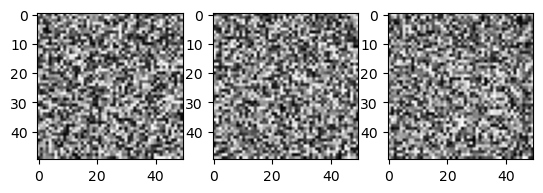

In [7]:
#we can use slice notation to pull out specific channels
#note that the original color_img 3D array is unchanged
red_color = color_img[:, :, 0]
green_color = color_img[:, :, 1]
blue_color = color_img[:, :, 2]

#plot it side by side
fig, ax = plt.subplots(1, 3)
#since we are back to displaying a 2D array, our images will appear gray
ax[0].imshow(red_color, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(green_color, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(blue_color, cmap='gray', vmin=0, vmax=255)

Since each pixel is an element within our 2D matrix, we can also pull out sections of our images to perform analyses or to visualize the intensity profiles.
```
red_color_profile = red_color[25,:]
green_color_profile = green_color[25,:]
blue_color_profile = blue_color[25,:]
```

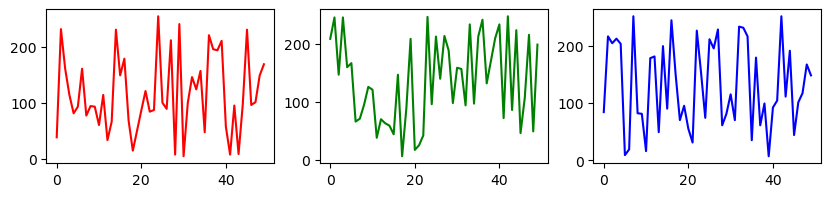

In [8]:
#we can also plot the intensity profiles along a row or column
red_color_profile = red_color[25,:] #just pull out the row you are interested in plotting using slice notation
green_color_profile = green_color[25,:]
blue_color_profile = blue_color[25,:]

#plot it all side by side
fig, ax = plt.subplots(1, 3, figsize=(10, 2))

ax[0].plot(red_color_profile, color='red')
ax[1].plot(green_color_profile, color='green')
ax[2].plot(blue_color_profile, color='blue')


<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Importing and displaying images</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 900px;"></hr>

Let's make use of our immunofluorescence data from MCB201A to do some image processing and then later today use it for image analysis. Upload three channels corresponding to a representative image of your serum starved cells (either YAP or TAZ) and (if you want) also a set of three channels for your serum stimulated cells. We'll import all of them and use the images to learn how to process images and analyze them to extract quantitative data from our images.

To import images, we will use <mark style="background-color: #EEEEEE;"><strong>plt.imread()</strong></mark>, which will turn our images into an array that we can play with using Python. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <mark style="background-color: #EEEEEE;"><strong>plt.imread()</strong></mark> is here.</u></a>
```
variable = plt.imread('File_name.extension')
```

In [9]:
#import our images using the plt.imread() function
no_serum_dapi = plt.imread('No_Serum_DAPI.tiff')
no_serum_yap = plt.imread('No_Serum_YAP.tiff')
no_serum_phall = plt.imread('No_Serum_Phalloidin.tiff')

serum_dapi = plt.imread('Serum_DAPI.tiff')
serum_yap = plt.imread('Serum_YAP.tiff')
serum_phall = plt.imread('Serum_Phalloidin.tiff')

In [10]:
print(no_serum_dapi.dtype)
print(2**16)

uint16
65536


Now let's take a look at our individual images side by side.

In [11]:
#we can combine our 2D arrays into a list so that we can use a for loop to plot them all 
no_serum_list = [no_serum_dapi,no_serum_yap,no_serum_phall]
serum_list = [serum_dapi, serum_yap, serum_phall]

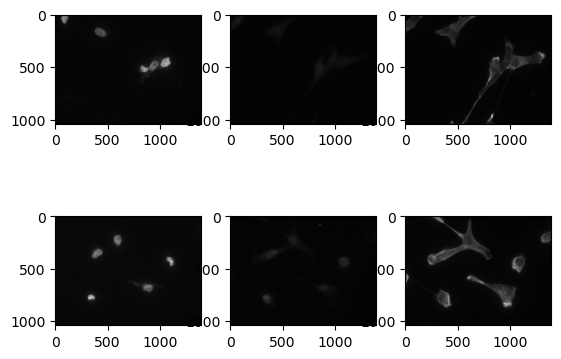

In [12]:
#set up subplots and use a for loop to plot each channel
fig, ax = plt.subplots(2, 3)

for i in np.arange(0, 3, 1):
    ax[0, i].imshow(no_serum_list[i], cmap='gray')#plotting in the top row
    ax[1, i].imshow(serum_list[i], cmap='gray')#plotting in the bottom row

<h2>Displaying images in color</h2>

If we want to display our images as a composite, we can construct a 3D array out of our separate 2D arrays by using the <mark style="background-color: #EEEEEE;"><strong>np.dstack()</strong></mark> function, which will stack our arrays along the third axis. 

For <mark style="background-color: #EEEEEE;"><strong>plt.imshow()</strong></mark>, the channels are defined in the order <mark style="background-color: #EEEEEE;"><strong>[red, green, blue]</strong></mark> along the third axis of our 3D matrix. Recall from earlier that the third axis contains the channels, and the order in which they are positioned along the third axis dictates their assigned color. So when we construct the 3D matrix, we'll need to pay attention to the order in which we provide our 2D matrices.
```
composite = np.dstack((red_channel, green_channel, blue_channel))
```

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.73].


[[0.02194617 0.02608696 0.02070393 ... 0.00165631 0.01283644 0.01118012]
 [0.02567288 0.01863354 0.02360248 ... 0.03478261 0.00414079 0.02153209]
 [0.01780538 0.01449275 0.01325052 ... 0.01656315 0.00662526 0.01780538]
 ...
 [0.00289855 0.02401656 0.02028986 ... 0.01076605 0.02732919 0.01532091]
 [0.01325052 0.01780538 0.0173913  ... 0.00496894 0.02857143 0.00910973]
 [0.02857143 0.00703934 0.00952381 ... 0.02277433 0.01283644 0.01614907]]


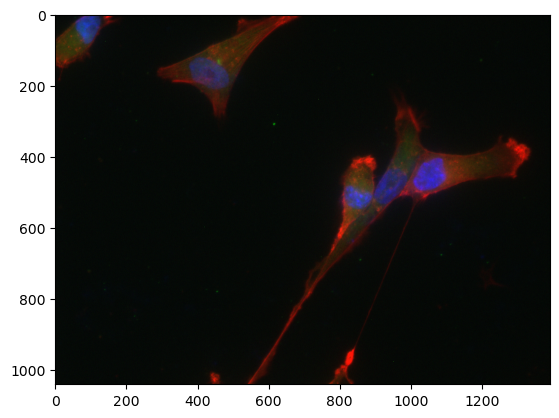

In [13]:
#we need to set up a 3D array from our individual channels
#the order in which we set up each channel is important since it dictates the color it will render as
ns_composite = np.dstack((no_serum_phall/1500, no_serum_yap/1500, no_serum_dapi/1500))
#we can scale our pixel intensity values to prevent our composite from being overexposed
#display our image
plt.imshow(ns_composite)

#showing that when we divide by either the max value in the array or another value
#all the values are scaled down
#if we divide by the max, we reduce our range down to 0-1, which will prevent the clipping warning when plotting
#but it can lead to dim images, so you can divide by a smaller value (but you'll get the clipping warning)
print(no_serum_phall/no_serum_phall.max())

If you're noticing a warning with your RGB image being displayed, you may need to normalize the intensity values by the maximum intensity value for each channel.
```
composite = np.dstack((red_channel/red_channel.max(), green_channel/green_channel.max(), blue_channel/blue_channel.max()))
```
This will scale your values between 0 and 1, allowing <mark style="background-color: #EEEEEE;"><strong>plt.imshow()</strong></mark> to display your color image without the warning.

If the image doesn't appear bright enough, you can also scale it with a value smaller than your max value, and the values that remain above 1 will be clipped to 1.
```
composite = np.dstack((red_channel/1500, green_channel/1500, blue_channel/1500))
```

If instead, you wanted to pseudocolor a single channel a particular color, you'll need to specify which channel(s) you want your image to be displayed in. In this case, you'll need to construct a 3D matrix consisting of your 2D array repeated along all three channels. Then you can clear the channel(s) that you don't want, while leaving the one(s) that you want displayed.

First, let's create a 3D matrix consisting of just our DAPI intensities.
```
Blue = np.dstack((blue_channel, blue_channel, blue_channel))
```

In [14]:
#if we want to pseudocolor a single channel, we can set up a 3D array of just our one channel (but repeated along the third axis)
blue_stack = np.dstack((no_serum_dapi, no_serum_dapi, no_serum_dapi))

Then, what we can do is to clear the channels that we don't want displayed and keep the blue channel. To do this, we can multiply our 3D matrix with a list containing three elements, with each element being either a 1 or 0 depending on whether or not we want to display a channel, leaving us with a 3D matrix that contains values only in the channel(s) we want displayed.
```
Blue_only = Blue*[0, 0, 1]
```

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1546666666666667].


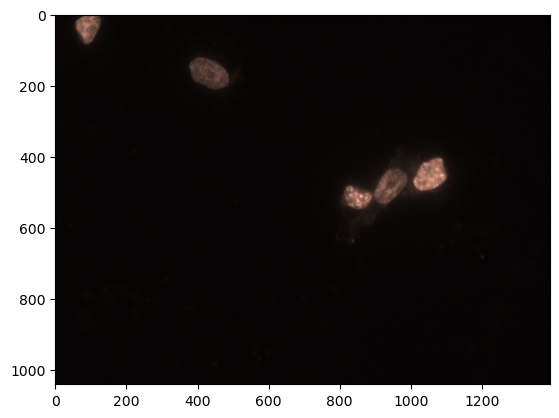

In [21]:
#then we can clear it by multiplying by 0 or keep it by multiplying by 1
#or we can adjust the color displayed more by using fractions
Blue_only = blue_stack*[1, 0.7, 0.6] #this gives a different color that's not red, blue, or green
#remember that screens follow the additive color model
plt.imshow(Blue_only/1500)

Remember that screens follow the additive color model, so if we wanted a color like magenta or yellow, we would then make use of 2 channels rather than one.
```
Blue_as_magenta = Blue*[1, 0, 1]
```

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Adjust threshold to isolate nuclei</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 900px;"></hr>

To identify a good threshold for us to use, we can take a look at the distribution of intensity values in our two nuclei images in a histogram. We will first need to collapse our 2D array into a single 1D array to make it easier to plot as a histogram by making use of the <mark style="background-color: #EEEEEE;"><strong>numpy.ndarray.flatten()</strong></mark> function. <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a>.

We can doing it simultaneously when we call up the histogram function:
```
sns.histplot(image_array.flatten(), bins=50)
```

(0.0, 25000.0)

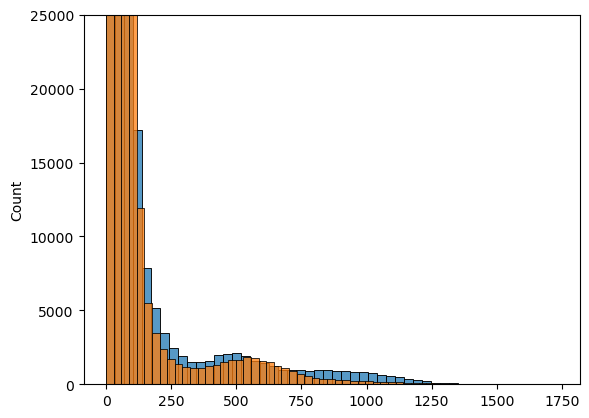

In [22]:
#we can take a look at the distribution of all pixel intensities in our image
#this will give us an idea of what threshold to use to differentiate between background and nuclei
sns.histplot(no_serum_dapi.flatten(), bins=50)
sns.histplot(serum_dapi.flatten(), bins=50)
plt.ylim(0, 25000)

Once you've identified a good spot to set as a threshold, you can apply a conditional statement to your DAPI images.
```
DAPI_thresh = DAPI_image > threshold
```

In [23]:
#here we are generating a binary image now using a conditional statement
no_serum_dapi_thresh = no_serum_dapi > 400
serum_dapi_thresh = serum_dapi > 400

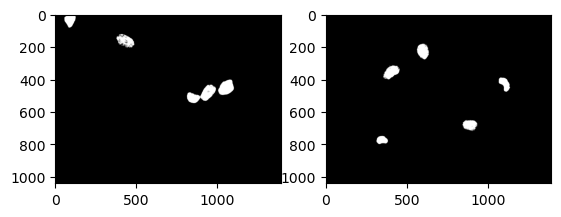

In [24]:
#taking a look at the binary
fig, ax = plt.subplots(1, 2)
ax[0].imshow(no_serum_dapi_thresh, cmap='gray')
ax[1].imshow(serum_dapi_thresh, cmap='gray')

Let's take a look at the data contained within our thresholded 2D arrays.

In [25]:
#if you look at the data itself, you can see it's a boolean
print(no_serum_dapi_thresh)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


You should be able to see now that your thresholded array contains Booleans. This is because we applied our conditional statement to each element in our 2D arrays, resulting in a Boolean output corresponding to whether or not each element in the array met that condition.

There are also many other ways to calculate thresholds. You can find additional information on how to use scikit-image to threshold your images <a href="https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_thresholding.html" rel="noopener noreferrer" target="_blank"><u>here.</u></a> scikit-image can also test multiple thresholding algorithms at once, so you can see which one will best fit your specific processing needs. 
```
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(your_image)
```

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


/srv/conda/lib/python3.11/site-packages/skimage/filters/thresholding.py:466: RuntimeWarning: divide by zero encountered in log
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) * (P1[:-1] * (1.0 - P1[:-1])) ** 2)


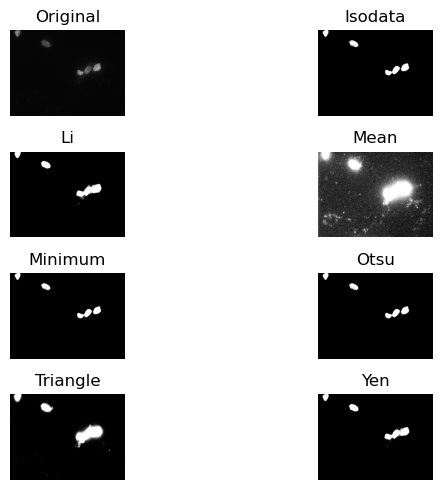

In [26]:
#if you're unsure what threshold algorithm works best, you can try them all
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(no_serum_dapi)

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #3: Pull quantitative data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 650px;"></hr>

We can use the **scikit-image packages** that we imported earlier to pull quantitative data from our images, specifically, we are going to use it to identify individual particles in our image by using <mark style="background-color: #EEEEEE;"><strong>skimage.measure.label()</strong></mark>. <a href="https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a> 

The <mark style="background-color: #EEEEEE;"><strong>skimage.measure.label()</strong></mark> function works by assigning any element with the value 0 as background (by default) and then identifying particles as clusters of connected elements that share the same value (in our case the value 1). Then it will assign each particle a label.
```
DAPI_thresh_label = skimage.measure.label(DAPI_thresh, return_num=True)
```

In [27]:
#we're going to have skimage.measure.label() function find each particle
#and then it will give it a label (some integer value)
#the integer value will replace the True values
#the False will become 0 (background)
no_serum_dapi_label, no_serum_dapi_numbers = skimage.measure.label(no_serum_dapi_thresh, return_num=True)
print(no_serum_dapi_numbers)
print(no_serum_dapi_label)
print(no_serum_dapi_thresh)

45
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Let's take a look at our labeled cells and differentiate them by assigning them each a color that they will display as. To do this, we'll need to make use of the <mark style="background-color: #EEEEEE;"><strong>label2rgb()</strong></mark> function, which returns a colored image where each label has its own color. So in our case, each one of our nuclei will have its own color. <a href="https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.label2rgb" rel="noopener noreferrer" target="_blank"><u>Documentation for <mark style="background-color: #EEEEEE;"><strong>label2rgb()</strong></mark> is here.</u></a>
```
colored_nuclei = label2rgb(DAPI_thresh_label)
plt.imshow(colored_nuclei)
```

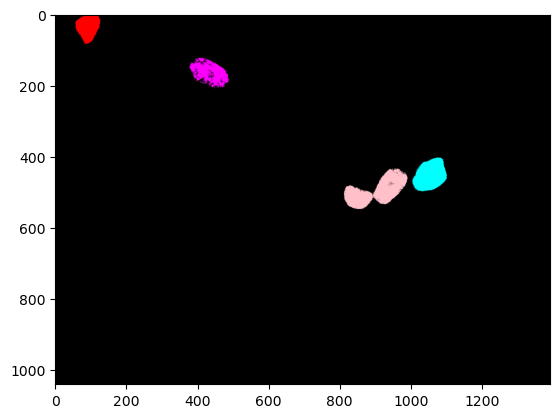

In [28]:
#use a function that will give a color to each labeled particle, so we can differentiate them when we visualize the 2D array
colored_nuclei = label2rgb(no_serum_dapi_label)
plt.imshow(colored_nuclei)

With our labeled nuclei, we can make use of the <mark style="background-color: #EEEEEE;"><strong>skimage.measure.regionprops()</strong></mark> function, which will measure a bunch of properties of each particle. <a href="https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops" rel="noopener noreferrer" target="_blank"><u>Documentation for <mark style="background-color: #EEEEEE;"><strong>skimage.measure.regionprops()</strong></mark>, including the full set of properties that it measures, can be found here.</u></a>
```
nuclei_properties = skimage.measure.regionprops(DAPI_thresh_label)
```

In [30]:
#now that particles are labeled, we can use skimage.measure.regionprops() to calculate bunch of different properties
nuclei_properties = skimage.measure.regionprops(no_serum_dapi_label)

Try printing the results.

In [31]:
print(nuclei_properties)
#you can see you have what is a list of RegionProperties objects
#each object contains a bunch of attributes that we can pull out

[<skimage.measure._regionprops.RegionProperties object at 0x78bdc31095d0>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc30a3a10>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc7cefc90>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109610>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109590>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109810>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109950>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109a50>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109b10>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109790>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109c50>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109d10>, <skimage.measure._regionprops.RegionProperties object at 0x78bdc3109dd0>, <skimage.measure._regionprops.RegionP

So what is going on? Let's pull out the first element to try and make sense of the output of this function.

In [32]:
print(nuclei_properties[0])

What you can see is that the first element is some set of <mark style="background-color: #EEEEEE;"><strong>RegionProperties</strong></mark>, and we can see from the documentation that we can access each property as an attribute.

If we wanted to get the area for our first particle:
```
nuclei_properties[0].area
```

In [33]:
print(nuclei_properties[44].area)
#here we are pulling out the area for one of the measured particles

1.0


And the number of elements in this output corresponds to the number of particles that we labeled.
```
print(len(nuclei_properties))
```

In [34]:
print(len(nuclei_properties))

print(no_serum_dapi_numbers)
#can see that the number of RegionProperties objects that we have is equal to the number of labeled particles
#that means the function went through all the particles and calculated their properties and stored it in its respective RegionProperties object

45
45


You can see that the output is not something we can make sense of without digging into each element one by one, so that means we will need to initiate a for-loop in order to get all the output data for a particular property that we're interested in.

For example, if we're interested in the area of our particles:
```
areas = []

for i in nuclei_properties:
     areas.append(i.area)
```

In this case, the iterable object that we provide is not just a simple list of <mark style="background-color: #EEEEEE;"><strong>[0,1,2,3,4,5]</strong></mark>, but rather it will go through each element of the list which corresponds to the <mark style="background-color: #EEEEEE;"><strong>RegionProperties</strong></mark> of each particle.

In [35]:
#since we have a bunch of RegionProperties objects in a list
#we can use a for loop to pull out the area for every particle
#saves us from typing in the same code over and over for each particle
#set up an empty list
areas = []

#start up our for loop
for i in nuclei_properties: #in this case, we're going to loop through all the RegionProperties objects
    areas.append(i.area) #and we're going to pull out the area and then append it to our empty list
    #as this loops, it will go through each RegionProperties object and pull out the area and add it to the end of our areas list

Let's take a look at the areas for our particles:

In [36]:
print(areas)

[4082.0, 1.0, 1.0, 5242.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 7.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 6.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 6601.0, 9817.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0]


So by using Python, we are able to extract quantitative the properties of our nuclei.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #4: Filter out noise</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 650px;"></hr>

Let's take a look at the distribution of our particle areas. This will help us see if we may have captured a lot of noise, and if we have noise, we can filter those "particles" out.

<Axes: ylabel='Count'>

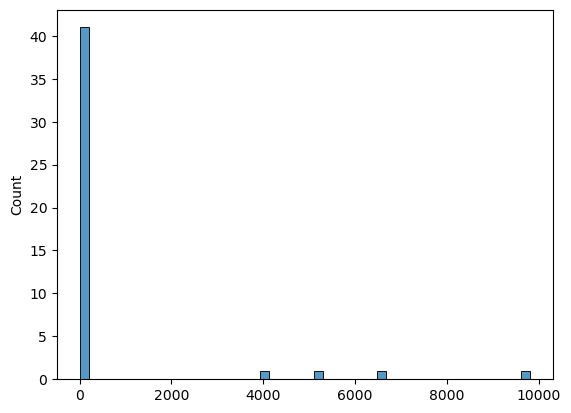

In [37]:
sns.histplot(areas, bins=50)

You can see that we have a fair number of tiny tiny particles with an area of less than 100 sq pixels, which probably correspond to noise and isn't something particularly interesting for us. So what we can do is apply a conditional statement to each of our particles based on whether or not their area is greater than what we consider noise.

Since we're going through each property again, we'll need a for loop to make our way through each particle.

```
nuclei_filtered = np.zeros_like(labels)

for i in nuclei_properties:
    if i.area > 100:
        nuclei_filtered = nuclei_filtered + (labels == i.label)

plt.imshow(nuclei_filtered)
```

Here, we've made use of the <mark style="background-color: #EEEEEE;"><strong>np.zeros_like()</strong></mark> function, which functions similarly to <mark style="background-color: #EEEEEE;"><strong>np.zeros()</strong></mark>, except that it will create an array of zeros with the shape of the object that we give it. So this is a convenient way of creating arrays of zeros with a desired shape.

Our for loop will again be working its way through each element in our <mark style="background-color: #EEEEEE;"><strong>nuclei_properties</strong></mark> and checking the area to see if it meets our threshold for an actual nucleus, and once it meets that condition, it will update our array with the label values. Here, we're not pulling the specific label value for each element. Instead, since anything not labeled will be zero, we can add the label array to our array of zeros, and it will essentially clone that label over without erasing any previous labels that were added.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


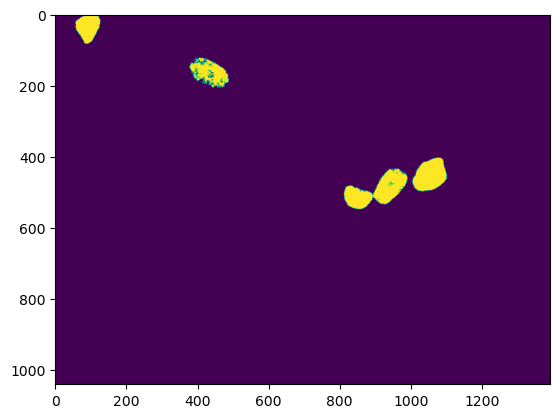

In [38]:
#we have a lot of noise that our threshold missed
#so we can filter them out by their area

#set up an array of zeros
nuclei_filtered = np.zeros_like(no_serum_dapi_label) #this will create a 2D array in the shape of no_serum_dapi_label
#it saves us from having to know the exact dimensions of our image

#start up our for loop
for i in nuclei_properties: #same thing here, where we take a look at all the RegionProperties objects
    if i.area > 100: #then we find the ones that are big enough to not be noise
        nuclei_filtered = nuclei_filtered + (no_serum_dapi_label == i.label) #and we save them - transfer them over to our new array

plt.imshow(nuclei_filtered)
print(nuclei_filtered)

Now we'll want to relabel our filtered cells, so that we can ignore the noise when we want to continue with our analysis.
```
nuclei_filtered_labels, number_labels = skimage.measure.label(nuclei_filtered, return_num=True)
```

4


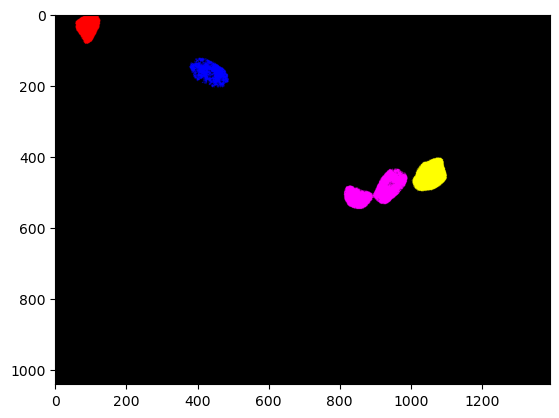

In [39]:
#now we have to relabel everything
nuclei_filtered_labels, number_labels = skimage.measure.label(nuclei_filtered, return_num=True)

print(number_labels)

colored_nuclei_filtered = label2rgb(nuclei_filtered_labels)
plt.imshow(colored_nuclei_filtered)

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #5: Pull out a single cell</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 650px;"></hr>

We can continue to make use of conditional statements to pull out a single cell by its label.
```
nuclei_1 = nuclei_filtered_labels == 1
```
This will create a new 2D array that pulls out the nucleus labeled as 1. 

In [40]:
#we can pull out each particle one by one based on its label using a conditional statement
nuclei_1 = nuclei_filtered_labels == 1 #this will pull out particle one
nuclei_2 = nuclei_filtered_labels == 2
nuclei_3 = nuclei_filtered_labels == 3
nuclei_4 = nuclei_filtered_labels == 4

And if we take a look at the data type contained within the 2D array created:

In [85]:
print(nuclei_1)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


You can see that it is a 2D array containing Boolean values, and only where the cell label matches what we specified will it return <mark style="background-color: #EEEEEE;"><strong>true</strong></mark>, which we can then visualize using <mark style="background-color: #EEEEEE;"><strong>plt.imshow()</strong></mark>.

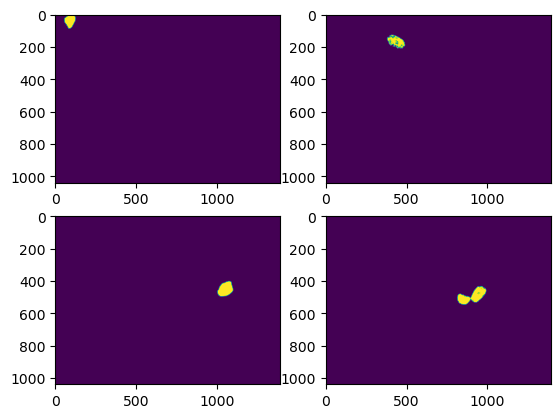

In [41]:
#plot our individual nuclei
fig, ax = plt.subplots(2, 2)

ax[0,0].imshow(nuclei_1)
ax[0,1].imshow(nuclei_2)
ax[1,0].imshow(nuclei_3)
ax[1,1].imshow(nuclei_4)

Since we have a handful of nuclei to plot, let's set up two separate for loops to plot out each individual nuclei side by side. The first for loop will be to pull out each nucleus, and the second for loop will be to plot them all.

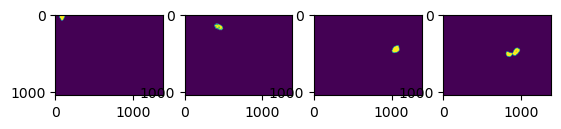

In [42]:
#put all our 2D arrays containing each individual nuclei into a list
all_nuclei = [np.zeros_like(nuclei_filtered_labels)]*number_labels

for i in np.arange(0, number_labels, 1):
    all_nuclei[i] = nuclei_filtered_labels == i+1
#this will come in handy later when we want to perform calculations for each nuclei
#we can use a for loop rather than typing the same code for each nuclei

#plot all of them side by side using a for loop
fig, ax = plt.subplots(1, 4)

for axis in np.arange(0, 4, 1):
    ax[axis].imshow(all_nuclei[axis])

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #6: Quantify mean nuclear fluorescence</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

With all of our nuclei filtered down to ones that are actually nuclei, we can then make use of another for loop to go through our labeled nuclei to calculate the mean nuclear fluorescence intensity of our transcription factor. 

In [44]:
print(all_nuclei[0])
#we can pull out a single nucleus from our list

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [45]:
#that means we can use a for loop now to measure the nuclear intensity of yap
mean_fluor_array = np.zeros(number_labels) #set up our array to hold our output
#in this case the output is just the mean nuclear fluorescence for each nucleus

#start up our for loop
for i in np.arange(0, number_labels, 1): #length of the index is determined by how many labeled particles we have
    fluorescence = no_serum_yap*all_nuclei[i] #use the thresholded nuclei as a mask to only look at nuclear fluorescence for that specific nucleus
    mean_fluor_array[i] = np.sum(fluorescence)/np.sum(all_nuclei[i]) #then calculate the mean nuclear fluorescence intensity

print(mean_fluor_array)

[315.1989221  261.3853491  237.79700045 277.82805338]


<h1 style="font-size: 40px; margin-bottom: 0px;">Challenge: Compare mean nuclear fluorescence</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

Let's do the same for our serum-stimulated cells now, so we can compare the mean nuclear fluorescence intensity between serum-starved and serum-stimulated cells.

For those of you who are more familiar with Python, see if you can define a function that will output the array of mean nuclear intensities for each cell and the mean of all nuclear intensities.

In [98]:
def mean_fluor(binary_image, tf_channel):
    """Calculating mean nuclear fluorescence"""
    #assign our YAP stain to a variable in the function to use later
    transcription_factor = tf_channel

    #Label our thresholded nuclei
    dapi_label_thresh, dapi_numbers = skimage.measure.label(binary_image, return_num=True)

    #get their properties
    nuc_props = skimage.measure.regionprops(dapi_label_thresh)

    #filter out the noise that we're not interested in
    areas = []
    for i in nuc_props:
        areas.append(i.area)

    #apply a conditional statement to remove noise
    nuc_filtered = np.zeros_like(dapi_label_thresh)
    for j in nuc_props:
        if j.area > 100:
            nuc_filtered = nuc_filtered + (dapi_label_thresh == j.label)

    #label our new filtered nuclei
    filtered_labels, filtered_numbers = skimage.measure.label(nuc_filtered, return_num=True)

    #group all our individual nuclei arrays into a single list
    all_nuclei = [np.zeros_like(filtered_labels)]*filtered_numbers
    for k in np.arange(0, filtered_numbers, 1):
        all_nuclei[k] = filtered_labels == k+1

    #measure mean fluorescence intensity
    mean_fluor_array = np.zeros(filtered_numbers)
    for l in np.arange(0, filtered_numbers, 1):
        fluorescence = transcription_factor*all_nuclei[l]
        mean_fluor_array[l] = np.sum(fluorescence)/np.sum(all_nuclei[l])

    result = mean_fluor_array.mean()
    return mean_fluor_array, result

array_ns, result_ns = mean_fluor(no_serum_dapi_thresh, no_serum_yap)
print(array_ns, result_ns)

array_s, result_s = mean_fluor(serum_dapi_thresh, serum_yap)
print(array_s, result_s)


comparison = stats.ttest_ind(array_ns, array_s, equal_var=False, nan_policy='omit')
if (comparison.pvalue < 0.05) & (result_s > result_ns):
    print('there is a significant increase in mean nuclear fluorescence in serum stim', comparison.pvalue)
elif (comparison.pvalue < 0.05) & (result_s < result_ns):
    print('there is a significant decrease in mean nuclear fluorescence in serum stim', comparison.pvalue)
elif comparison.pvalue >= 0.05:
    print('there is no significant difference')

[315.1989221  261.3853491  237.79700045 277.82805338] 273.0523312579197
[380.63236157 473.85084306 506.61147903 342.2733564  673.05910961] 475.28542993575684
there is a significant increase in mean nuclear fluorescence in serum stim 0.022467771508912496


<h1 style="font-size: 40px; margin-bottom: 0px;">Challenge: Watershed (separate overlapping particles)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

While there isn't a single function that will allow us to perform a watershed operation on overlapping particles, <a href="https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_watershed.html" rel="noopener noreferrer" target="_blank"><u>we can take a look at the documentation in scikit-image to see how we can perform watershed segmentation.</u></a>

Then we can pull out specific segmented regions by their label and use that as a mask for our original threshold to separate the two overlapping nuclei.